<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

<b>Median value of owner-occupied homes</b>

For the "Median value of owner-occupied homes" provide a boxplot

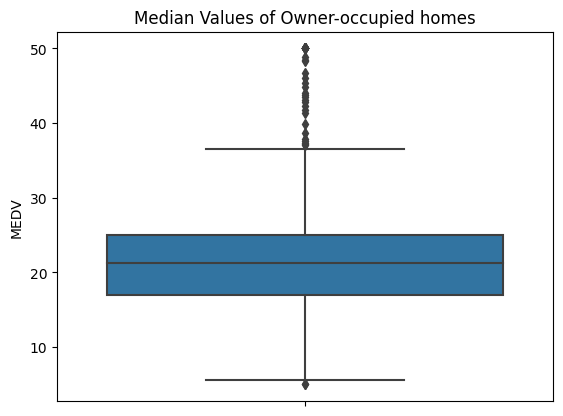

In [9]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median Values of Owner-occupied homes");

<b>Histogram for the Charles river variable</b>

Provide a histogram for the Charles river variable

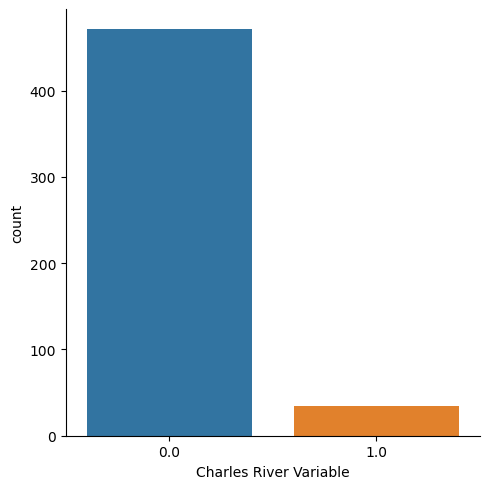

In [12]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River Variable");

<b>Boxplot for the MEDV variable vs the AGE variable</b>

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [13]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

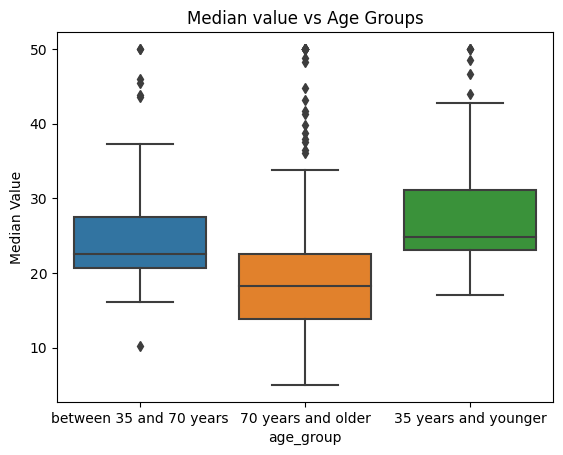

In [14]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value");

<b>Relationship between Nitric Oxide Concentrations and The Proportion of Non-retail Business Acres Per Town</b>
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

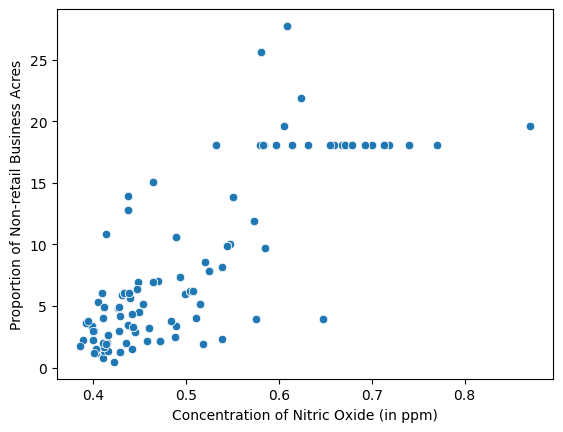

In [16]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");

From the above scatter plot, we can say that there is a positive sloping relationship between concentration of Nitric Oxides and the proportion of non-retail business areas per town. But as the concentration of grows more than 0.6 ppm, the industrial area remains approximately the same.

<b>The teacher pupil ratio</b>

Create a histogram for the pupil to teacher ratio variable

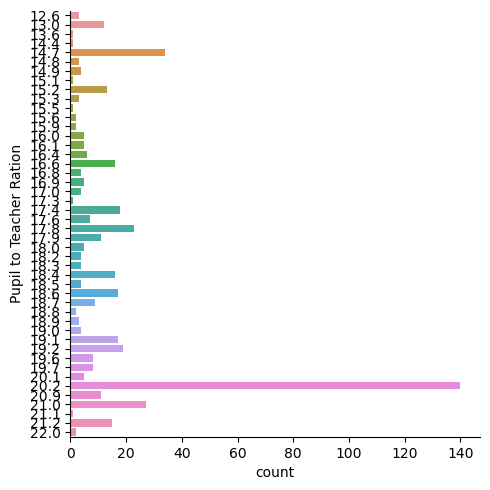

In [18]:
sns.catplot(y="PTRATIO", kind="count", data=boston_df)
plt.ylabel("Pupil to Teacher Ration");

<ipython-input-19-d226462e7753>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df.PTRATIO, kde=False, bins=15)


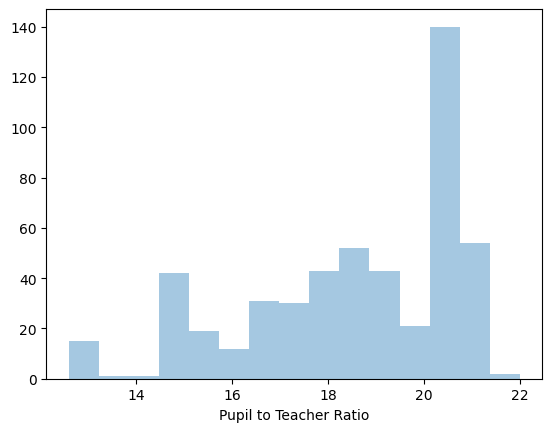

In [19]:
# Distribution plot
sns.distplot(boston_df.PTRATIO, kde=False, bins=15)
plt.xlabel("Pupil to Teacher Ratio");

In [21]:
import scipy.stats

<b>Question 1
Is there a significant difference in median value of houses bounded by the Charles river or not?</b>

Stating Hypothesis

H
0
:
µ
1
=
µ
2
 ("there is no difference in between the median value of houses bounded by Charles river and not bounded.")

H
a
:
µ
1
≠
µ
2
 ("there is a difference in between the median value of houses bounded by Charles river and not bounded.")

Setting α to 0.05

In [22]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is no significance difference in median value of houses bounded by Charles river and not.

<b>Question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
</b>

Stating Hypothesis

Null Hypothesis: There is no difference in median values of houses for occupied units built prior to 1940.
Alternative Hypothesis: There is a difference in median values of houses for occupied units built prior to 1940.
Setting alpha = 0.05

In [23]:
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

In [24]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964923, pvalue=0.2083265383143275)

Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940

<b>Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
</b>

Stating Hypothesis:

Null Hypothesis: There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

Alternative Hypothesis: There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

Setting alpha to 0.05

In [25]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.7636514469209189, 7.913361061211254e-98)

Conclusion: Since the p-value is greater than 0.05, we can reject the null hypothesis that there is no relationship between the nitric acid concentration and the proportion of non-retail business acres per town.

And as the r value is positive and close to zero, we can conclude that there is a almost strong relationship between these two variables and the relationship curve will be positively sloping.

<b>Question 4
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
</b>

In [28]:
import statsmodels.api as sm

In [29]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        15:45:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.